Diabetes Linear Regression with scikit-learn

Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

Load and Extract the Data

In [2]:
disease = datasets.load_diabetes()

In [3]:
print(disease)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [4]:
disease_X = disease.data[:, np.newaxis, 2]   #consider 3rd feature

# disease_X = disease.data

In [5]:
print(disease_X)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [6]:
# Get the shape of the data
data_size = disease.data.shape
target_size = disease.target.shape


print("Data size of Diabetes dataset:", data_size)

print("Target size of Diabetes dataset:", target_size)


Data size of Diabetes dataset: (442, 10)
Target size of Diabetes dataset: (442,)


Train-Test Split

In [7]:
X_train = disease_X[:-30]   #skip last 30 datapoints
X_test  = disease_X[-20:]   # considers last 20 datapoints

y_train = disease.target[:-30]
y_test  = disease.target[-20:]

Generate Model

In [8]:
reg = linear_model.LinearRegression()

In [9]:
reg.fit(X_train, y_train)

LinearRegression()

Prediction

In [10]:
y_pred = reg.predict(X_test)

In [11]:
y_pred

array([226.70014103, 116.09940303, 163.78962951, 115.08471736,
       121.17283138, 158.71620116, 236.84699773, 122.18751705,
        99.86443231, 124.21688839, 205.39174197,  96.8203753 ,
       154.65745848, 131.31968807,  83.62946159, 171.90711487,
       138.42248776, 138.42248776, 190.17145692,  84.64414726])

Evaluate Accuracy

In [12]:
accuracy = mean_squared_error(y_test, y_pred)

In [13]:
print('accuracy : ', accuracy)

accuracy :  2561.3204277283853


In [14]:
weights = reg.coef_
intercept = reg.intercept_
print('weigths and intercept :', weights, intercept)

weigths and intercept : [941.43097333] 153.39713623331644


To plot a regression line, we need to reshape the data

In [15]:
# Get the feature names
feature_names = disease.feature_names
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [16]:
# disease_X = disease.data[:, np.newaxis, 2]   #consider 3rd feature

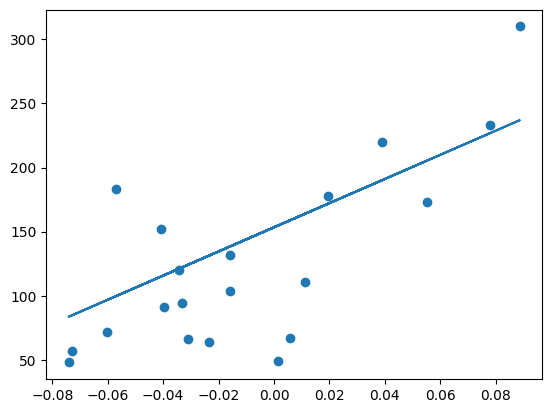

In [17]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.show()